In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
from collections import defaultdict
import time
import copy

'\n\n# 1. (12p) list the source codes for your 3 implementations\n\nans. The next three cells includes the source code for the required implementation\n\n'

In [ ]:
# This cell is dedicated for a random graph builder and also a function to visualise it.

def node_generator(size):
    node_names = []
    fname = "N"
    lname = 0
    
    while size>0:
        node_names.append(fname+str(lname))
        lname += 1
        size -= 1   
        
    return node_names


def graph_matrix_generator(row, col):
    sq_matrix_size = row * col
    
    graph=[[0 for i in range(sq_matrix_size)]for i in range(sq_matrix_size)]
    
    for i in range(len(graph)-1):
        if (i+1)%col !=0:
            if i<=len(graph)-1:
                weight = randint(1,9)
                graph[i][i+1]= weight
                graph[i+1][i]= weight
                
            if i <=len(graph)-1-col:
                weight = randint(1,9)
                graph[i][i+col] = weight
                graph[i+col][i] = weight
                
        else:
            if i <=len(graph)-1-col:
                weight = randint(1,9)
                graph[i][i+col] = weight
                graph[i+col][i] = weight 
                
    return graph


def adjacency_matrix_viewer(graph):
    for i in range(len(graph)):
        for j in range(len(graph[0])):
            print(graph[i][j], end = " ")
        print()


def graph_visualiser(graph_matrix, graph_row, graph_col):
    row = len(graph_matrix)
    col = len(graph_matrix[0])
    
    nodes = node_generator(size = row)
    G = nx.Graph()
    height = graph_row - 1
    cnt = 0
    
    for i in range(graph_row):
        for j in range(graph_col):
            G.add_node(nodes[cnt], pos=(j,height))
            cnt += 1
        height -= 1
        
    for i in range(row):
        for j in range(i+1,col):
            if graph_matrix[i][j] != 0:
                G.add_edge(nodes[j], nodes[i], weight = graph_matrix[i][j])
                
    pos = nx.get_node_attributes(G,'pos')
    nx.draw(G,pos, node_size = 1600, node_color='purple')
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_labels(G, pos, font_size=14, font_color = "white", font_family="sans-serif")
    nx.draw_networkx_edge_labels(G,pos, font_size = 12,edge_labels = labels)
    plt.savefig('trial1.jpg')

In [ ]:
# This cell is dedicated for the implementation of Floyd's Algorithm

def matrix_for_floyd(adj_matrix):
    infinite = 1000
    
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if i!=j and adj_matrix[i][j] == 0:
                adj_matrix[i][j] = infinite
                
    return adj_matrix


def floyd(G):
    distance_matrix = matrix_for_floyd(G)
    
    for k in range(len(distance_matrix)):
        for i in range(len(distance_matrix)):
            for j in range(len(distance_matrix)):
                distance_matrix[i][j] = min(distance_matrix[i][j], distance_matrix[i][k] + distance_matrix[k][j])
                
    return distance_matrix


def view_matrix(adj_matrix):
    infinite = 1000
    
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if(adj_matrix[i][j] == infinite):
                print("∞", end=" ") #Opt+5 for infinite sign in mac
            else:
                print(adj_matrix[i][j], end="    "if adj_matrix[i][j]>9 else "     ")
                
        print(" ")

In [ ]:
# This cell is dedicated for the implementation of Dijkstra's Algorithm

def min_distance(dist, queue): 
    minimum = float("Inf") 
    min_index = -1
    
    for i in range(len(dist)): 
        if dist[i] < minimum and i in queue: 
            minimum = dist[i] 
            min_index = i
            
    return min_index 



def print_path(parent, j): 
    if parent[j] == -1 :  
        print("N"+str(j),end="  ")
        return
    
    print_path(parent, parent[j]) 
    print("N"+str(j),end="  ")


def print_solution(dist, parent, src):
    print("\n\nWhen the starting node is N"+str(src))
    print("\nNodes \t\tDistance from Source\tPath")
    
    for i in range(0, len(dist)):
        if src!=i:
            print("\n","N"+str(src),"to N"+str(i)," \t\t ",dist[i],end="\t\t ")
            print_path(parent,i)



def dijkstra(graph, src): 
    row = len(graph) 
    col = len(graph[0]) 
    dist = [float("Inf")] * row 
    parent = [-1] * row 
    dist[src] = 0
    queue = []
    
    for i in range(row): 
        queue.append(i)
        
    while queue: 
        u = min_distance(dist, queue)      
        queue.remove(u) 
        for i in range(col): 
            if graph[u][i] and i in queue: 
                if dist[u] + graph[u][i] < dist[i]: 
                    dist[i] = dist[u] + graph[u][i] 
                    parent[i] = u

    return dist, parent, src

In [ ]:
'''


'\n\n2. (16p) for a graph G with 3 rows and 3 columns, constructed by your random graph building algorithm,\n(a) give a visual representation of G\n(b) display the result (a 9 × 9 matrix) of running Floyd’s algorithm on G\n(c) for each of the 9 nodes, display the result of running Dijkstra’s algorithm on G with that node as source\n\n'


Adjacency Matrix representation of the Graph G: 
0 7 0 2 0 0 0 0 0 
7 0 9 0 4 0 0 0 0 
0 9 0 0 0 4 0 0 0 
2 0 0 0 6 0 2 0 0 
0 4 0 6 0 4 0 3 0 
0 0 4 0 4 0 0 0 4 
0 0 0 2 0 0 0 4 0 
0 0 0 0 3 0 4 0 2 
0 0 0 0 0 4 0 2 0 

Visual Representation of the Graph G: 


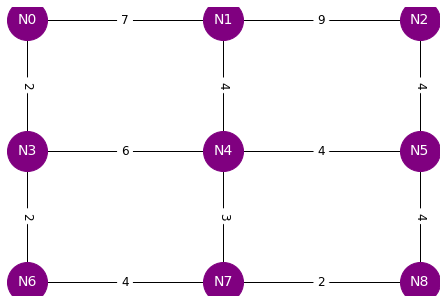

In [ ]:
# Visual Representation of a Graph G with 3 rows and 3 columns

row = 3
col = 3

G = graph_matrix_generator(row, col)
G1 = copy.deepcopy(G)

print("\nAdjacency Matrix representation of the Graph G: ")
adjacency_matrix_viewer(G)

print("\nVisual Representation of the Graph G: ")
graph_visualiser(G, row, col)

In [ ]:
#Result of Graph (a 9 × 9 matrix) of running Floyd’s algorithm on G

print("9 × 9 matrix of running Floyd’s algorithm on Graph G:\n")
output_matrix = floyd(G)
view_matrix(output_matrix)

9 × 9 matrix of running Floyd’s algorithm on Graph G:

0     7     16    2     8     12    4     8     10     
7     0     9     9     4     8     11    7     9      
16    9     0     14    8     4     14    10    8      
2     9     14    0     6     10    2     6     8      
8     4     8     6     0     4     7     3     5      
12    8     4     10    4     0     10    6     4      
4     11    14    2     7     10    0     4     6      
8     7     10    6     3     6     4     0     2      
10    9     8     8     5     4     6     2     0      


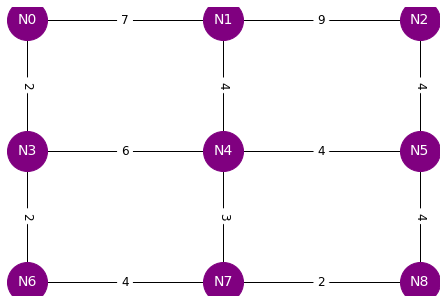

In [ ]:
graph_visualiser(G1, 3, 3)

#Note: G1 is just a copy of G
#From this graph representation we can check the outputs of dijkstra's algorithm for all sources in cell below:

In [ ]:
#2.c For each of the 9 nodes, display the result of running Dijkstra’s algorithm on G with that node as source

for i in range(len(G1)):
    dist, parent, src = dijkstra(G1, i)
    print_solution(dist, parent, src)



When the starting node is N0

Nodes 		Distance from Source	Path

 N0 to N1  		  7		 N0  N1  
 N0 to N2  		  16		 N0  N1  N2  
 N0 to N3  		  2		 N0  N3  
 N0 to N4  		  8		 N0  N3  N4  
 N0 to N5  		  12		 N0  N3  N4  N5  
 N0 to N6  		  4		 N0  N3  N6  
 N0 to N7  		  8		 N0  N3  N6  N7  
 N0 to N8  		  10		 N0  N3  N6  N7  N8  

When the starting node is N1

Nodes 		Distance from Source	Path

 N1 to N0  		  7		 N1  N0  
 N1 to N2  		  9		 N1  N2  
 N1 to N3  		  9		 N1  N0  N3  
 N1 to N4  		  4		 N1  N4  
 N1 to N5  		  8		 N1  N4  N5  
 N1 to N6  		  11		 N1  N4  N7  N6  
 N1 to N7  		  7		 N1  N4  N7  
 N1 to N8  		  9		 N1  N4  N7  N8  

When the starting node is N2

Nodes 		Distance from Source	Path

 N2 to N0  		  16		 N2  N1  N0  
 N2 to N1  		  9		 N2  N1  
 N2 to N3  		  14		 N2  N5  N4  N3  
 N2 to N4  		  8		 N2  N5  N4  
 N2 to N5  		  4		 N2  N5  
 N2 to N6  		  14		 N2  N5  N8  N7  N6  
 N2 to N7  		  10		 N2  N5  N8  N7  
 N2 to N8  		  8		 N2  N5  N8  

When the sta

'\n\n3. (12p) for a graph G′ with 20 rows and 20 columns, constructed (you don’t need to display it visually)\nby your random graph building algorithm,\n(a) list the time (measured say in ms) it takes to run Floyd’s algorithm on G′\n(b) list the time it takes to run Dijkstra’s algorithm on G′ with node 0 as the source\n(c) list the total time it takes to run, for each node u in G′, Dijkstra’s algorithm on G′ with u as the source\n\n'

In [ ]:
# Time it takes to run Floyd’s algorithm on G′ where G' = 20 rows * 20 columns

row = 20
col = 20

G_dash = graph_matrix_generator(row, col)
G1_dash = copy.deepcopy(G_dash)


start_time = time.time()
floyd(G_dash)
end_time = time.time()

print("Floyd's Algorithm Completed. We don't print the matrix as it is a 400*400 matrix and won't make a lot of sense to display it")
print("Time taken to run floyd's algorithm on G': ",end_time-start_time,"seconds")

Floyd's Algorithm Completed. We don't print the matrix as it is a 400*400 matrix and won't make a lot of sense to display it
Time taken to run floyd's algorithm on G':  19.26272225379944 seconds


In [ ]:
#Time it takes to run Dijkstra’s algorithm on G′ with node 0 as the source

start_time = time.time()
dijkstra(G1_dash, 0)
end_time = time.time()

print("We don't show the output as there are 400 nodes which is too large.")
print("\nTime taken to run Dijkstra's algorithm on G' with source as N0: ",end_time-start_time,"seconds")

We don't show the output as there are 400 nodes which is too large.

Time taken to run Dijkstra's algorithm on G' with source as N0:  0.14774274826049805 seconds


In [ ]:
#Time it takes to run Dijkstra’s algorithm on G′ with all nodes as the source

start_time = time.time()

for i in range(len(G1_dash)):
    dijkstra(G1_dash, i)
end_time = time.time()

print("\nTime taken to run Dijkstra's algorithm on G' with all possble source: ",end_time-start_time,"seconds")


Time taken to run Dijkstra's algorithm on G' with all possble source:  55.191426515579224 seconds


'\n\n4. (12p) for a graph G′′ with 28 rows and 28 columns (and thus with approximately twice as many nodes as G′),\nconstructed by your random graph building algorithm, list running times as in Question 3\n\n'

In [ ]:
# Time it takes to run Floyd’s algorithm on G'' where G'' = 28 rows * 28 columns

row = 28
col = 28

G_dash_dash = graph_matrix_generator(row, col)
G1_dash_dash = copy.deepcopy(G_dash_dash)

print("We don't show the output as it is a 784*784 matrix which is way too large")

start_time = time.time()
floyd(G_dash_dash)
end_time = time.time()

print("Time taken to run floyd's algorithm on G'': ",end_time-start_time,"seconds")

We don't show the output as it is a 784*784 matrix which is way too large
Time taken to run floyd's algorithm on G'':  146.37955045700073 seconds


In [ ]:
# Time it takes to run Dijkstra’s algorithm on G'' with node 0 as the source


start_time = time.time()
dijkstra(G1_dash_dash, 0)
end_time = time.time()

print("\nTime taken to run Dijkstra's algorithm on G'' with source as N0: ",end_time-start_time,"seconds")


Time taken to run Dijkstra's algorithm on G'' with source as N0:  0.9356033802032471 seconds


In [ ]:
# Time it takes to run Dijkstra’s algorithm on G'' with all possible nodes as the source

start_time = time.time()

for i in range(len(G1_dash_dash)):
    dijkstra(G1_dash_dash, i)
    
end_time = time.time()

print("\nTime taken to run Dijkstra's algorithm on G'' with all possble source: ",end_time-start_time,"seconds")


Time taken to run Dijkstra's algorithm on G'' with all possble source:  750.2632949352264 seconds


In [1]:
'''

Time Complexity Analysis of both the Algorithms

ans. We know that, theoretically the asymptotic time complexity of Floyd's Algorithm is O(V^3).
And as V is increasing from 400 to 784 from G' to G'' respectively which means that the input is
increasing approximately 2 times meaning the running time should be increasing approximately 2^3
i.e. 8 times. And from the results we can see that for Floyd's Algorithm on G' time taken is approx
15 sec and on G'' is approx 116 sec i.e. increment in approx 8 times which means it indeed follows its
theoretical asymptotic time complexity.

Theoretically, using adjacency matrix representation of graph, time complexity of Dijkstra's Algorithm is
O(V^2) for a "single node". And as V is increasing from 400 to 784 from G' to G'' respectively which means
that the input is increasing approximately 2 times meaning the running time should be increasing approximately
2^2 i.e. 4 times. For a single node N0 in G' we can see that time taken is 0.098 sec approx and N0 in G'' is 
0.665 approx which is around 7-8 times. However, it doesn't mean that there is something wrong. And the reason
behind that is (if you carefully take a look at my code) I've been keeping records for all the paths of the
shortest distance and that is the reason why it takes longer to execute as well as rate of change is higher
than expected as the way our graph is structured from first to last node the rate of increase in path is also
similar.

Also, for all the nodes i.e. 400 for G' and 784 for G'', We have time = 38 sec and time = 516 sec approx which
means it is increasing at around 13-14 times which is syncing exactly as it should as 7-8 multilied by the ratio
of 784 and 400. --> (I guess (not sure) this also gives us a proof that, the extra time required is probably
because of stored paths)

'''

'\n\nTime Complexity Analysis of both the Algorithms\n\nans. We know that, theoretically the asymptotic time complexity of Floyd\'s Algorithm is O(V^3).\nAnd as V is increasing from 400 to 784 from G\' to G\'\' respectively which means that the input is\nincreasing approximately 2 times meaning the running time should be increasing approximately 2^3\ni.e. 8 times. And from the results we can see that for Floyd\'s Algorithm on G\' time taken is approx\n15 sec and on G\'\' is approx 116 sec i.e. increment in approx 8 times which means it indeed follows its\ntheoretical asymptotic time complexity.\n\nTheoretically, using adjacency matrix representation of graph, time complexity of Dijkstra\'s Algorithm is\nO(V^2) for a "single node". And as V is increasing from 400 to 784 from G\' to G\'\' respectively which means\nthat the input is increasing approximately 2 times meaning the running time should be increasing approximately\n2^2 i.e. 4 times. For a single node N0 in G\' we can see that ti